In [ ]:
pip install demoji

In [ ]:
# Libraries
import demoji
import nltk
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
import spacy
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
demoji.download_codes()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-e53c98853d7b>:28: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df.dropna(subset=['text'], inplace=True)

def clean_text(text):
    text = re.sub(r'[^A-Za-z ]+', ' ', text)
    text = ' '.join(text.split())
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

print("Text")
print(df['text'].head())
print()
print("Cleaned Text")
print(df['cleaned_text'].head())

Text
0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

Cleaned Text
0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger fanny is ...
2    Subject unbelievable new homes made easy im wa...
3    Subject color printing special request additio...
4    Subject do not have money get software cds fro...
Name: cleaned_text, dtype: object


In [ ]:
def remove_emojis(text):
    return demoji.replace(text, '')

df['cleaned_text'] = df['cleaned_text'].apply(remove_emojis)

for i in range(5):
    print("Email with Emojis Removed:", df['text'][i])

Email with Emojis Removed: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days 

In [ ]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

def perform_lemmatization_nltk(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['cleaned_text'] = df['cleaned_text'].apply(perform_lemmatization_nltk)

for i in range(5):
    print("Original Text:", df['text'][i])
    print("CLeaned Text :", df['cleaned_text'][i])
    print()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text: Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordabil

In [ ]:
def remove_stop_words_nltk(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

df['cleaned_text'] = df['cleaned_text'].apply(remove_stop_words_nltk)
for i in range(5):
    print("Email without Stop Words :", df['cleaned_text'][i])

df.head()

Email without Stop Words : Subject naturally irresistible corporate identity lt really hard recollect company market full suqgestions information isoverwhelminq good catchy logo stylish statlonery outstanding website make task much easier promise havinq ordered iogo company automaticaily become world ieader isguite ciear without good product effective business organization practicable aim hotat nowadays market promise marketing effort become much effective list clear benefit creativeness hand made original logo specially done reflect distinctive company image convenience logo stationery provided format easy use content management system letsyou change website content even structure promptness see logo draft within three business day affordability marketing break make gap budget satisfaction guaranteed provide unlimited amount change extra fee surethat love result collaboration look portfolio interested
Email without Stop Words : Subject stock trading gunslinger fanny merrill muzo colza

,text,spam,cleaned_text
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,Subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,Subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,Subject money get software cd software compati...


In [ ]:
# Question - 1
X = df['cleaned_text'].values
y = df['spam'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))

    def train(self, X, y):
        for doc, label in zip(X, y):
            for word in doc.split():
                self.word_counts[label][word] += 1
            self.class_counts[label] += 1

    def predict(self, X):
        predictions = []
        for doc in X:
            words = doc.split()
            scores = {label: 0 for label in self.class_counts}
            for label in self.class_counts:
                for word in words:
                    word_count = self.word_counts[label][word] + 1
                    class_count = self.class_counts[label] + len(self.word_counts[label])
                    scores[label] += (word_count / class_count)
            predictions.append(max(scores, key=scores.get))
        return predictions

nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)

predictions = nb_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, predictions)
print("Accuracy:", accuracy)

report = classification_report(y_valid, predictions)
print(report)

Accuracy: 0.7445127304653204
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       843
           1       1.00      0.02      0.03       296

    accuracy                           0.74      1139
   macro avg       0.87      0.51      0.44      1139
weighted avg       0.81      0.74      0.64      1139



Accuracy: 0.9780509218612818


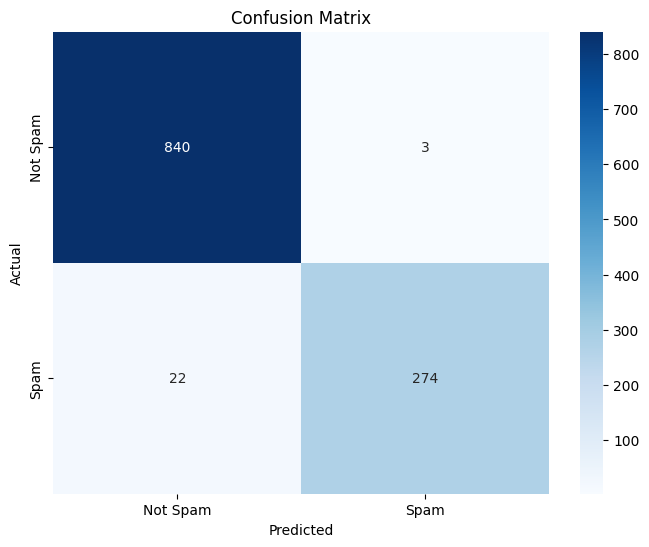

In [ ]:
# Question - 2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

y_pred = logistic_regression.predict(X_valid_tfidf)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Question - 3
def extract_features(text):
    text_length = len(text)
    words = text.split()
    avg_word_length = np.mean([len(word) for word in words])
    capital_letters = sum(1 for char in text if char.isupper())
    punctuation_count = sum(1 for char in text if char in '.,;:!?')
    numerals = sum(1 for char in text if char.isdigit())

    return [text_length, avg_word_length, capital_letters, punctuation_count, numerals]

X_features = [extract_features(text) for text in X]
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7401229148375769


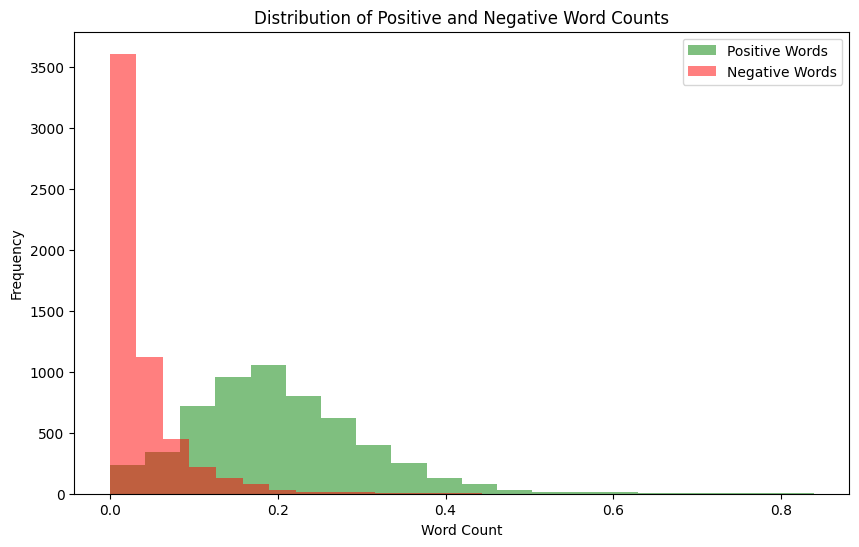

In [ ]:
# Question - 4
analyzer = SentimentIntensityAnalyzer()

positive_word_counts = []
negative_word_counts = []

for sentence in df['cleaned_text']:
    sentiment_scores = analyzer.polarity_scores(sentence)
    positive_word_counts.append(sentiment_scores['pos'])
    negative_word_counts.append(sentiment_scores['neg'])

plt.figure(figsize=(10, 6))
plt.hist(positive_word_counts, bins=20, alpha=0.5, color='green', label='Positive Words')
plt.hist(negative_word_counts, bins=20, alpha=0.5, color='red', label='Negative Words')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Positive and Negative Word Counts')
plt.legend()
plt.show()

In [ ]:
# Question - 5
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

logistic_regression_l1 = LogisticRegression(penalty='l1', C=1.0, solver='saga')
logistic_regression_l1.fit(X_train_tfidf, y_train)

logistic_regression_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
logistic_regression_l2.fit(X_train_tfidf, y_train)

y_pred_l1 = logistic_regression_l1.predict(X_valid_tfidf)
y_pred_l2 = logistic_regression_l2.predict(X_valid_tfidf)

accuracy_l1 = accuracy_score(y_valid, y_pred_l1)
accuracy_l2 = accuracy_score(y_valid, y_pred_l2)

print("Accuracy with L1 regularization:", accuracy_l1)
print("Accuracy with L2 regularization:", accuracy_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy with L1 regularization: 0.9692712906057945
Accuracy with L2 regularization: 0.9780509218612818
